<a href="https://colab.research.google.com/github/rafaemac/Projetos-Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_Santiago%2C_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Santiago, Chile*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, no Chile, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame e colocar o ID como indexador
df = pd.read_csv("/content/Santiago.csv",
                 index_col="id")

## Análise dos Dados


**Dicionário das variáveis**

* `Id` - número de id gerado para o imóvel em questão;
* `name`- nome da propriedade anunciada;   
* `host_id` - id ligada ao locatário da propriedade;
* `host_name` - nome do proprietário/anfitrião;
* `neighbourhood_group` - coluna sem nenhum valor válido;
* `neighbourhood` - nome do bairro;
* `latitude` - coordenada de latitude da propriedade;
* `longitude` - coordenada de longitude da propriedade;
* `room_type` - informa o tipo de quarto oferecido;
* `price` - informa o preço diário do aluguel;
* `minimum_nights` - informa o número mínimo de noites para aluguel;
* `number_of_reviews` - número de reviews que a propriedade possui;
* `last_review` - data do último review;
* `reviews_per_month` - quantidade mensal de reviews;
* `calculated_host_listings_count` - quantidade de imóveis do anfitrião;
* `availability_365` - número de dias por ano em que a propriedade esteve disponível

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-08-30,0.22,1,276,4,NaN
49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,45652,3,0,NaN,NaN,2,176,0,NaN
52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,46513,1,46,2021-11-04,0.34,3,89,1,NaN
53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.57,1,266,1,NaN
55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Em um primeiro contato com o DataSet, é muito importante saber quais são as variáveis que possuímos e que tipo de dados cada uma delas nos entregará.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
# identificando os tipos de variáveis
df.dtypes

Entradas:	 9139
Variáveis:	 17


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade do DataSet depende em grande parte da quantidade de valores válidos presentes nele.
Abaixo, podemos ver que a coluna `neighbourhood_group` possui todos os seus valores nulos. A variável `license` também possui grande parte de seus valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.988401
last_review                       0.356604
reviews_per_month                 0.356604
name                              0.000438
host_name                         0.000438
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Plotaremos os histogramas das variáveis numéricas para fazer uma primeira avaliação sobre a distribuição dos dados.

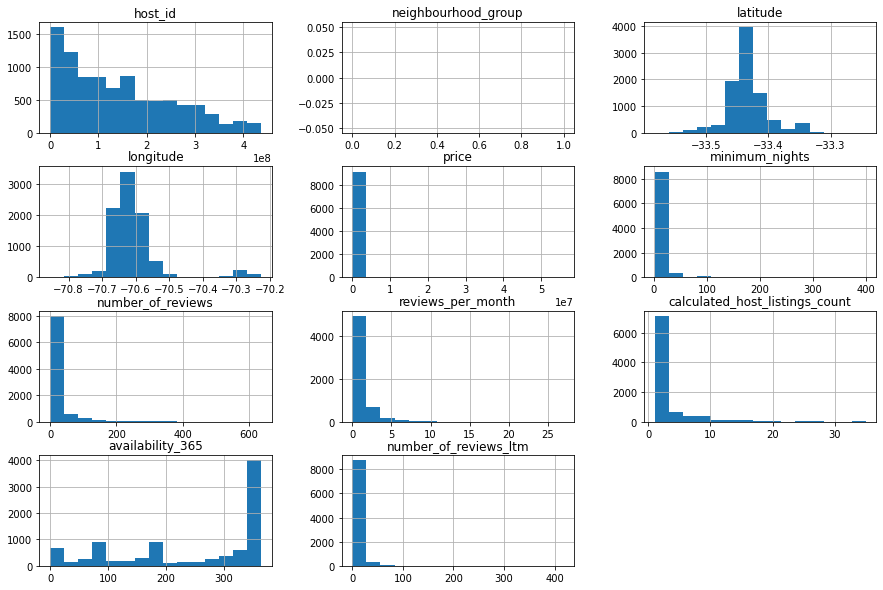

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4 - Existem *Outliers* na distribuição dos dados?**

Analisando os histogramas acima, algumas coisas são perceptíveis:


1.   A coluna `neighbourhood_group` não apresenta nenhum valor válido;
2.   A coluna `price` apresenta alguns *outliers*, ou seja, valores
que estão muito distantes do padrão de distribuição, e que acabam modificando significativamente os resultados da análise;
3.   A coluna `minimum nights` apresenta *outliers* também;
4.   Outras colunas apresentam valores significativamente distantes da distribuição normal, porém os valores que serão mais profundamente analisados dizem respeito às colunas `price` e `minimum_nights`.

Para a localização de *outliers*, 2 ferramentas são comumente utilizadas: o uso do comando `describe()` e o uso de gráficos de distribuição.



In [ ]:
#avaliando as variáveis númericas através da função describe
df[['price','minimum_nights','number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.139000e+03,9139.000000,9139.000000,5880.000000,9139.000000,9139.000000
mean,7.999007e+04,7.251231,17.942554,0.910160,3.025605,248.003830
std,8.707143e+05,26.967635,40.411300,1.378244,4.312533,127.789544
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.153400e+04,1.000000,0.000000,0.110000,1.000000,142.000000
50%,3.500000e+04,2.000000,2.000000,0.400000,1.000000,319.000000
75%,5.400000e+04,3.000000,16.000000,1.150000,3.000000,364.000000
max,5.598833e+07,400.000000,638.000000,27.000000,35.000000,365.000000


A tabela acima mostra alguns pontos interessantes:

1.   Apesar de 75% dos preços estarem abaixo de 54000 pesos chilenos, o maior valor
da coluna é de 55988330.
2.   O valor máximo de noites mínimas é maior do que o disponível em um ano;

Na sequência, analisaremos graficamente a presença destes *outliers*:

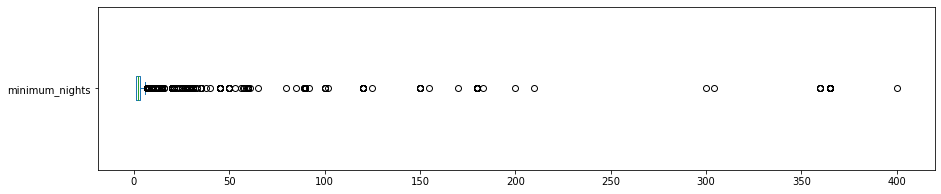

minimum_nights: valores acima de 30:
247 entradas
2.7027%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

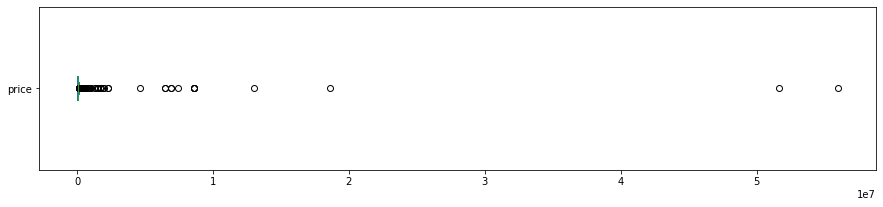

preço: valores acima de 1000000 de pesos chilenos:
890 entradas
0.2845%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("preço: valores acima de 1000000 de pesos chilenos:")
print("{} entradas".format(len(df[df.price > 100000])))
print("{:.4f}%".format((len(df[df.price > 1000000]) / df.shape[0])*100))

### **Q5 - Removendo os *Outliers***

Após identificar a presença de *outliers* no Dataframe atual, é hora de removê-los e gerar os gráficos novamente.

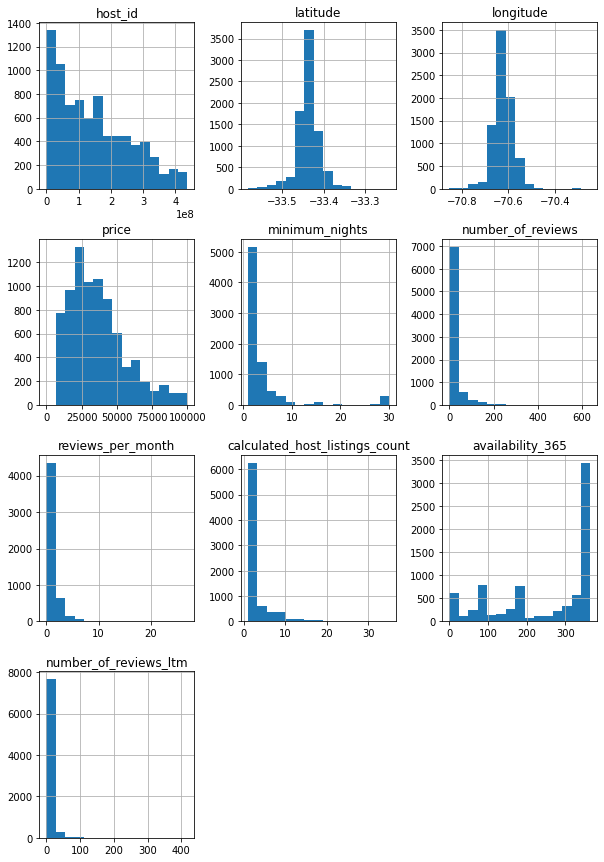

In [ ]:
#remover a coluna neighbourhood_group
df_clean = df.copy()
df_clean.drop('neighbourhood_group',axis=1, inplace=True)
#remover a coluna license
df_clean.drop('license', axis=1, inplace=True)
#Removendo preços acima de 100000 de pesos
df_clean.drop(df_clean[df_clean.price> 100000 ].index, axis=0, inplace=True)
#Removendo valores de noites mínimas acima de 30 dias
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#plotando novamente as variáveis
df_clean.hist(bins=15, figsize=(10,15));

### **Q6. Qual a média dos preços de aluguel?**

Com os *outliers* removidos, podemos obter valores mais acurados dos preço médio de aluguéis na cidade de Santiago, no Chile, em pesos chilenos.

In [ ]:
# ver a média da coluna "price"
df_clean.price.mean()

35934.37862386463

### **Q7. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida em função do coeficiente de correlação, que estabelece qual a intensidade da ligação entre as variáveis. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.058128,0.031011,0.066718,0.131070,0.062240
minimum_nights,-0.058128,1.000000,0.002993,-0.099584,-0.059549,-0.071366
number_of_reviews,0.031011,0.002993,1.000000,0.632130,0.081752,-0.063043
reviews_per_month,0.066718,-0.099584,0.632130,1.000000,0.139345,0.061313
calculated_host_listings_count,0.131070,-0.059549,0.081752,0.139345,1.000000,0.087164
availability_365,0.062240,-0.071366,-0.063043,0.061313,0.087164,1.000000


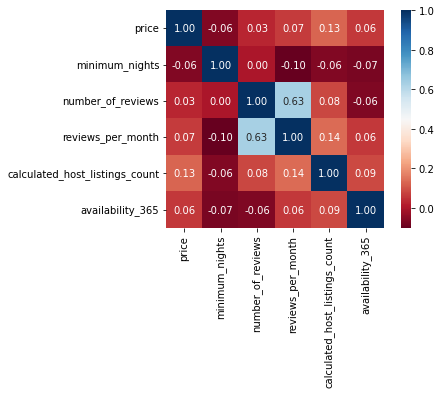

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4402
Private room       3370
Shared room         185
Hotel room           80
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df.shape[0])*100

Entire home/apt    48.167196
Private room       36.874932
Shared room         2.024291
Hotel room          0.875369
Name: room_type, dtype: float64

### **Q9. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Lo Espejo              97540.000000
Lo Barnechea           56086.785714
Las Condes             45395.518987
Vitacura               45228.170213
Cerro Navia            40849.571429
Pudahuel               39942.078431
Providencia            39699.185139
Huechuraba             35101.358974
Peñalolén              33432.766667
Santiago               33348.673149
Recoleta               33324.339713
Renca                  31613.454545
Estación Central       31412.289062
La Florida             31225.616071
Quilicura              30458.944444
San Miguel             28479.860656
Ñuñoa                  27911.261128
Maipú                  27289.557143
Macul                  24534.018692
San Joaquín            23832.800000
La Cisterna            23259.968750
La Reina               23252.569106
Cerrillos              22910.857143
Independencia          22746.236364
Conchalí               22383.875000
Quinta Normal          21917.075000
El Bosque              20131.800000
La Granja     

Olhando os valores acima, percebemos que o bairro Lo Espejo é disparadamente mais caro do que os demais. Abaixo, veremos se este valor é representativo ou não, ao listar todos os imóveis localizados nele:

In [ ]:
df_clean.loc[df_clean.neighbourhood == "Lo Espejo"]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,
6386713,viaja a la copa america con comodid,33289113,Angela,Lo Espejo,-33.51676,-70.67502,Private room,97540,1,0,NaN,NaN,1,365,0,NaN


Podemos ver que apenas 1 imóvel localizado neste bairro está listado, e portanto, este valor de aluguel diário pode não ser representativo.

Abaixo, está representada a distribuição dos imóveis pelas coordenadas de latitude (x) e longitude (y).

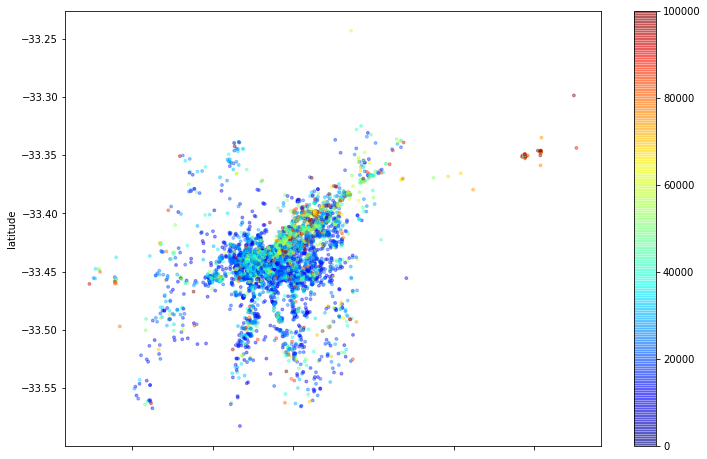

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q10. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

O mínimo de noites para aluguel é um pré-requisito especificado pelo dono da propriedade, e indica a quantidade mínima de noites que o cliente deverá pagar para ter acesso à propriedade.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.8542988677367176

## Conclusões


Através de dados retirados do próprio site da **Airbnb**, foi possível obter alguns dados interessantes sobre a cidade de Santiago, no Chile.

Apesar do conjunto de dados possuir alguns *outliers*, algumas considerações podem ser feitas.
A primeira é que boa parte dos imóveis (50% deles, segundo este conjunto de dados) podem ser alugados por valores de até 35000 pesos chilenos (o equivalente a 205 reais por dia, na cotação atual), considerando a totalidade dos dados. Caso os *outliers* sejam desconsiderados, este valor cai para 32286 pesos(190 reais).

Disponibilidade parece não ser um problema em Santiago, pois 50% dos imóveis encontram-se disponíveis em mais de 300 dias do ano (316, para ser mais preciso).

Boa parte dos imóveis (75% deles) requer, no máximo, 3 noites de aluguel como requisito mínimo. Convenhamos que, para alguém esteja a passeio na cidade, 3 dias é um número bastante aceitável.

Por fim, devemos levar em consideração que este DataSet é apenas uma versão resumida dos dados disponíveis para Santiago. Na versão mais completa, é possível analisar 106 variáveis no total, o que seria ideal para uma análise mais aprofundada.